In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import re

In [ ]:
tweets = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
print(tweets[:10]) # target - 1 is disaster

   id keyword  ...                                               text target
0   1     NaN  ...  Our Deeds are the Reason of this #earthquake M...      1
1   4     NaN  ...             Forest fire near La Ronge Sask. Canada      1
2   5     NaN  ...  All residents asked to 'shelter in place' are ...      1
3   6     NaN  ...  13,000 people receive #wildfires evacuation or...      1
4   7     NaN  ...  Just got sent this photo from Ruby #Alaska as ...      1
5   8     NaN  ...  #RockyFire Update => California Hwy. 20 closed...      1
6  10     NaN  ...  #flood #disaster Heavy rain causes flash flood...      1
7  13     NaN  ...  I'm on top of the hill and I can see a fire in...      1
8  14     NaN  ...  There's an emergency evacuation happening now ...      1
9  15     NaN  ...  I'm afraid that the tornado is coming to our a...      1

[10 rows x 5 columns]


In [ ]:
print(tweets.shape)

(7613, 5)


In [ ]:
tweets.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
## Exploratory data analysis

plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams['figure.dpi'] = 120

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Real or not real disaster tweets')

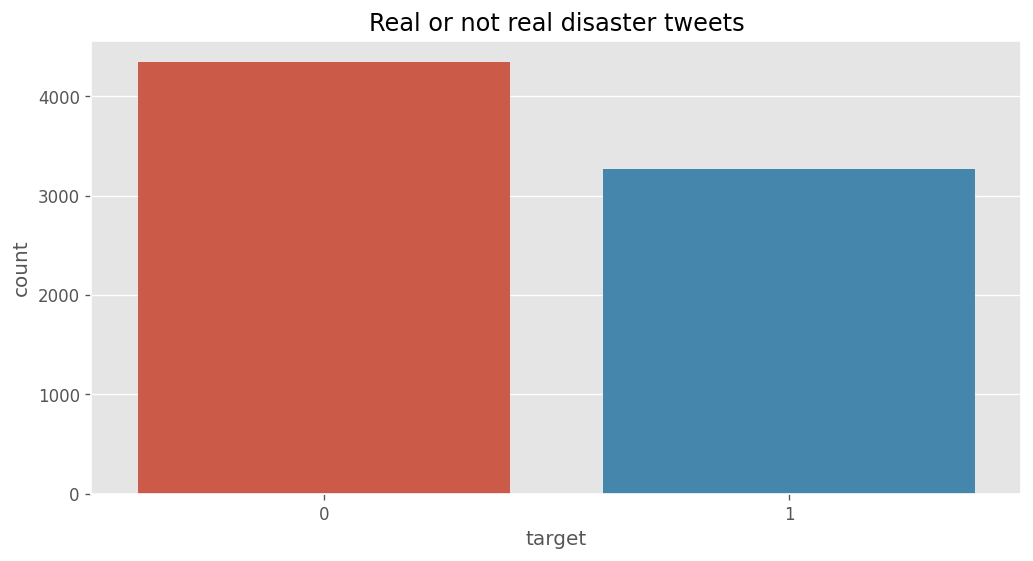

In [ ]:
sns.countplot('target',data=tweets)
plt.title('Real or not real disaster tweets')

In [ ]:
tweets['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

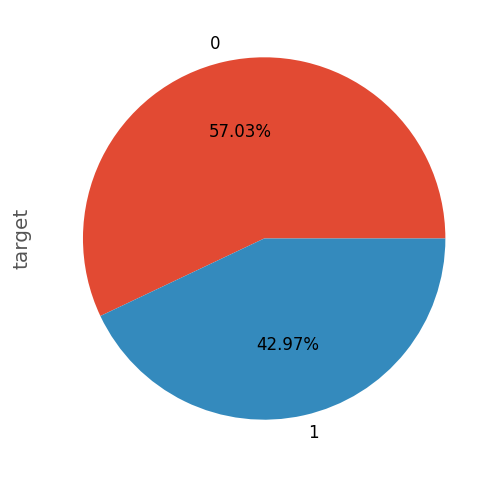

In [ ]:
tweets['target'].value_counts().plot.pie(autopct='%1.2f%%')

In [ ]:
# Number of characters in tweets distribution

!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git 

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-64k_1p9x
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-64k_1p9x
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-cp37-none-any.whl size=11743 sha256=3253bc30f900b3a47f1cc36a9fa34f18a5e8d8810877398b3e3af6ae45fa64ce
  Stored in directory: /tmp/pip-ephem-wheel-cache-8432q7vo/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as prep

In [ ]:
tweets = prep.get_basic_features(tweets)

### character count analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


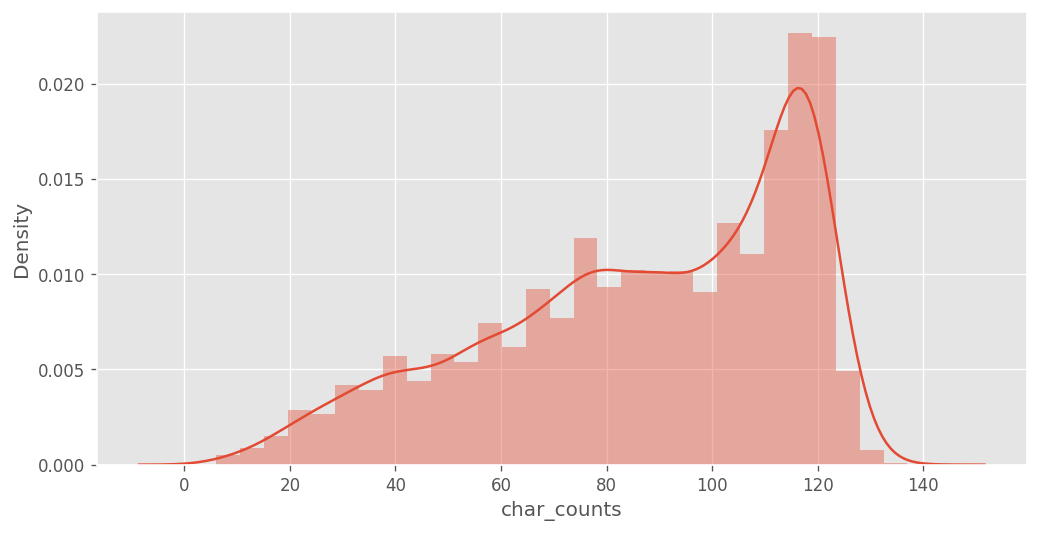

In [ ]:
sns.distplot(tweets['char_counts'])

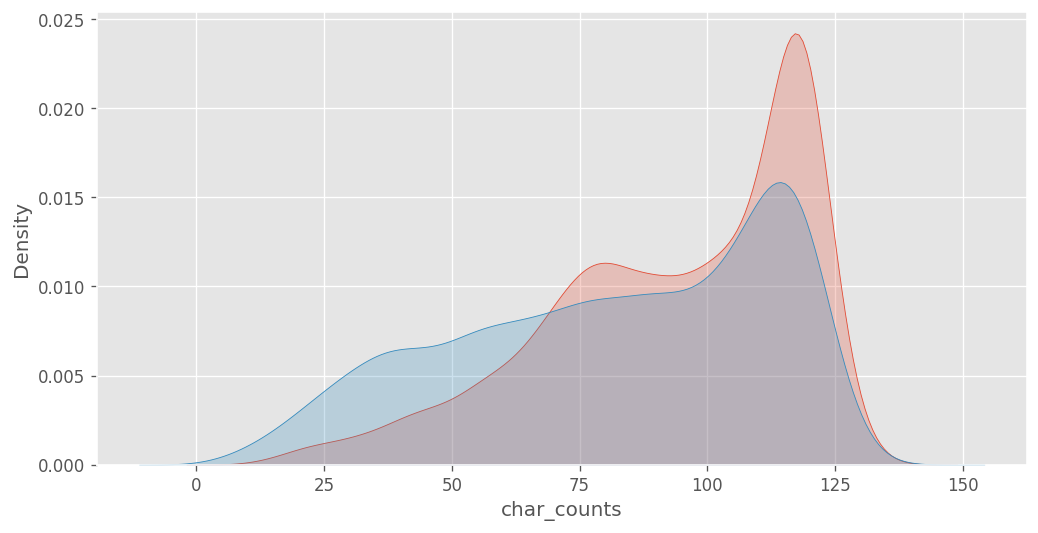

In [ ]:
sns.kdeplot(tweets[tweets['target']==1]['char_counts'],shade=True)
sns.kdeplot(tweets[tweets['target']==0]['char_counts'],shade=True)

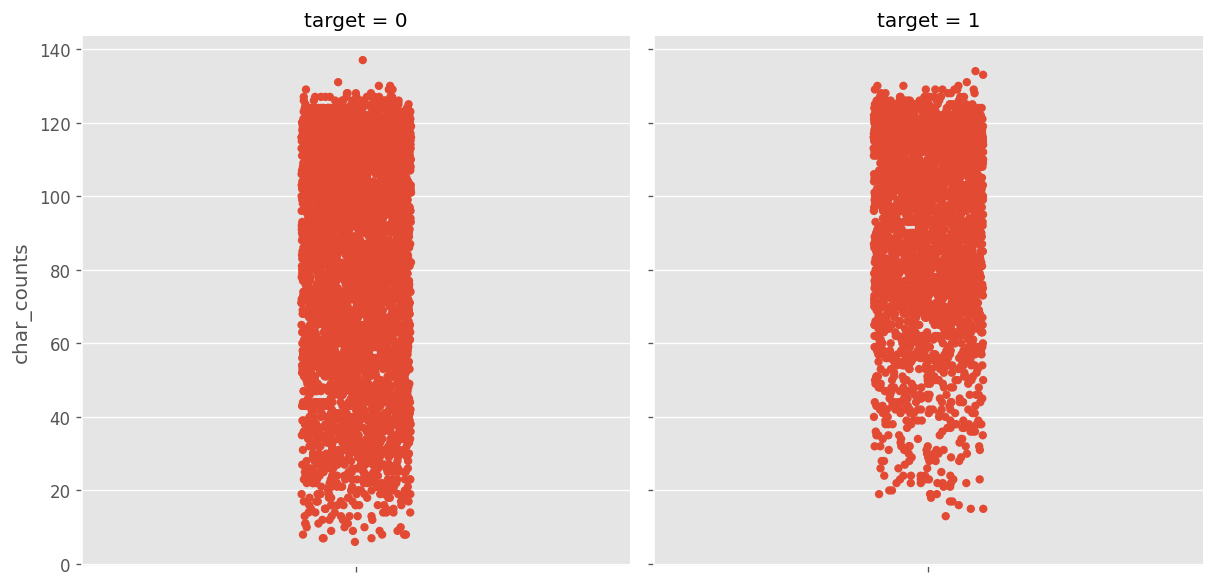

In [ ]:
sns.catplot(y='char_counts',data=tweets,col='target')

Word Count analysis

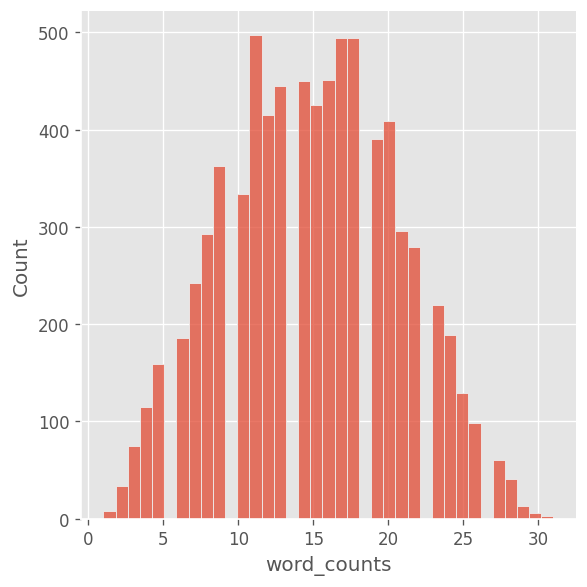

In [ ]:
sns.displot(tweets['word_counts'])

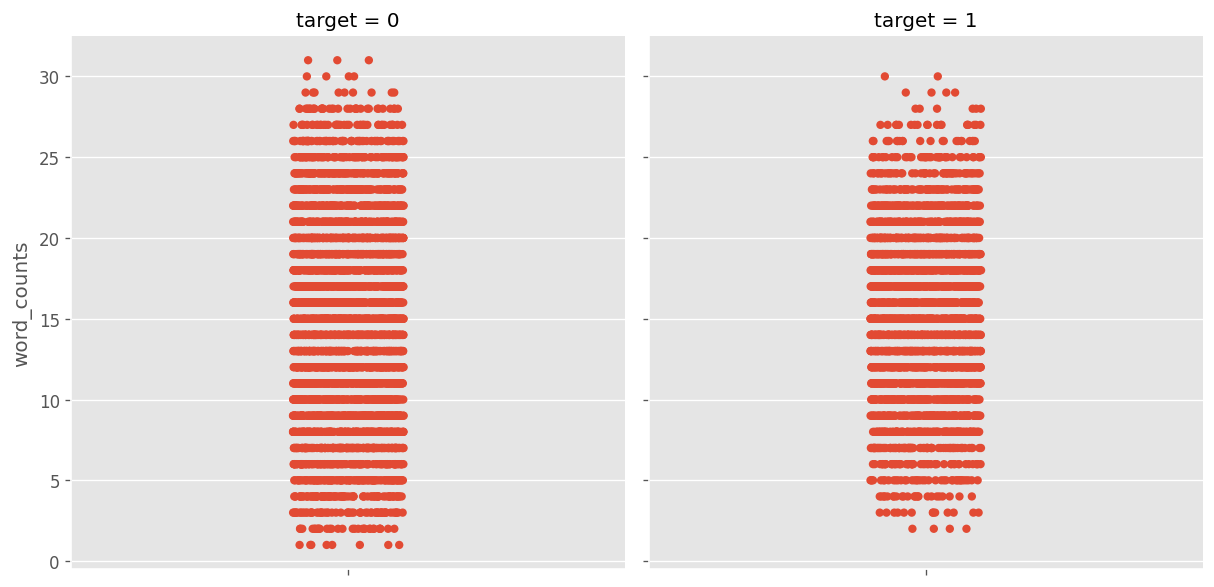

In [ ]:
sns.catplot(y='word_counts',data=tweets,col='target')

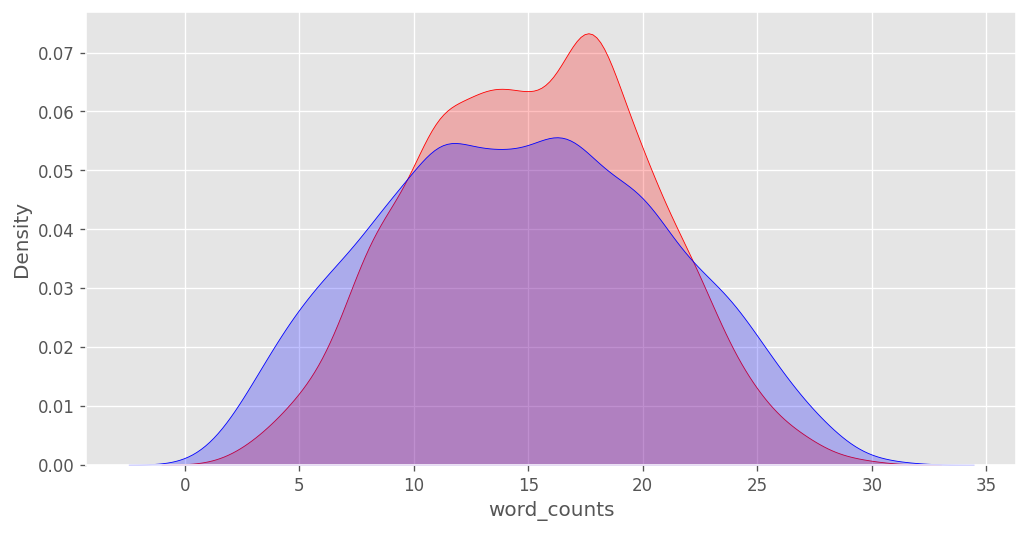

In [ ]:
sns.kdeplot(tweets[tweets['target']==1]['word_counts'],shade=True,color='red')
sns.kdeplot(tweets[tweets['target']==0]['word_counts'],shade=True,color='blue')

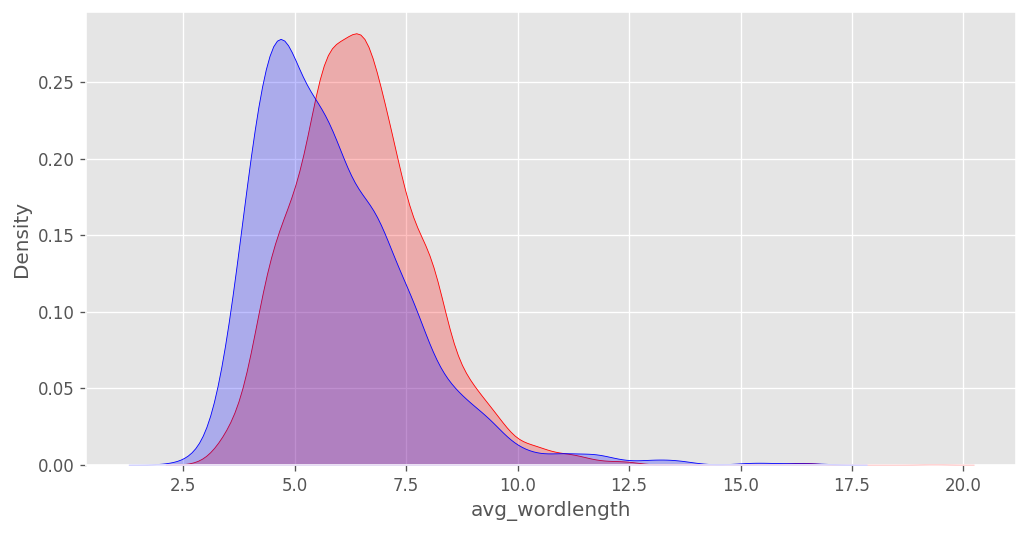

In [ ]:
sns.kdeplot(tweets[tweets['target']==1]['avg_wordlength'],shade=True,color='red')
sns.kdeplot(tweets[tweets['target']==0]['avg_wordlength'],shade=True,color='blue')

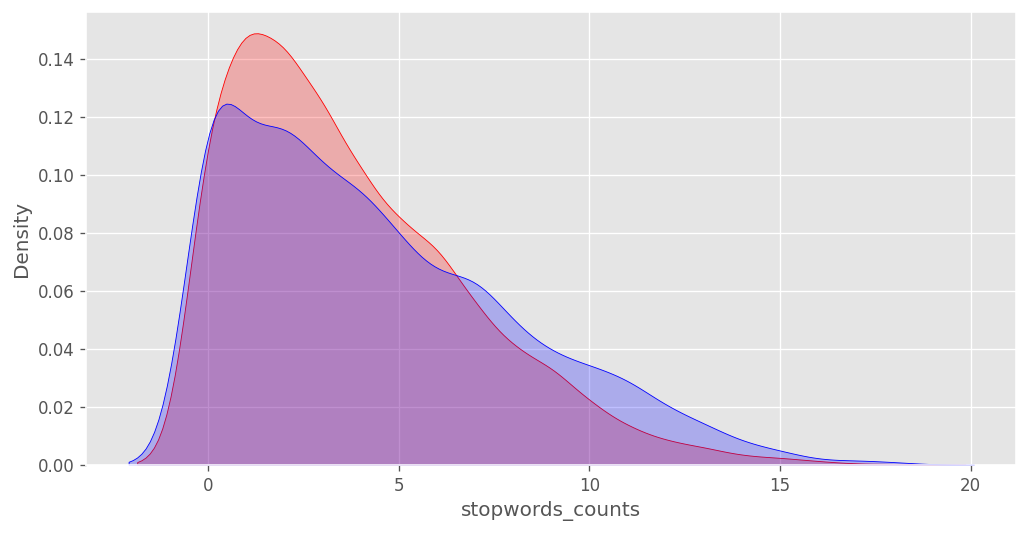

In [ ]:
sns.kdeplot(tweets[tweets['target']==1]['stopwords_counts'],shade=True,color='red')
sns.kdeplot(tweets[tweets['target']==0]['stopwords_counts'],shade=True,color='blue')

Most and least common words

In [ ]:
freqs = prep.get_word_freqs(tweets,'text')

In [ ]:
top40 = freqs[50:100]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

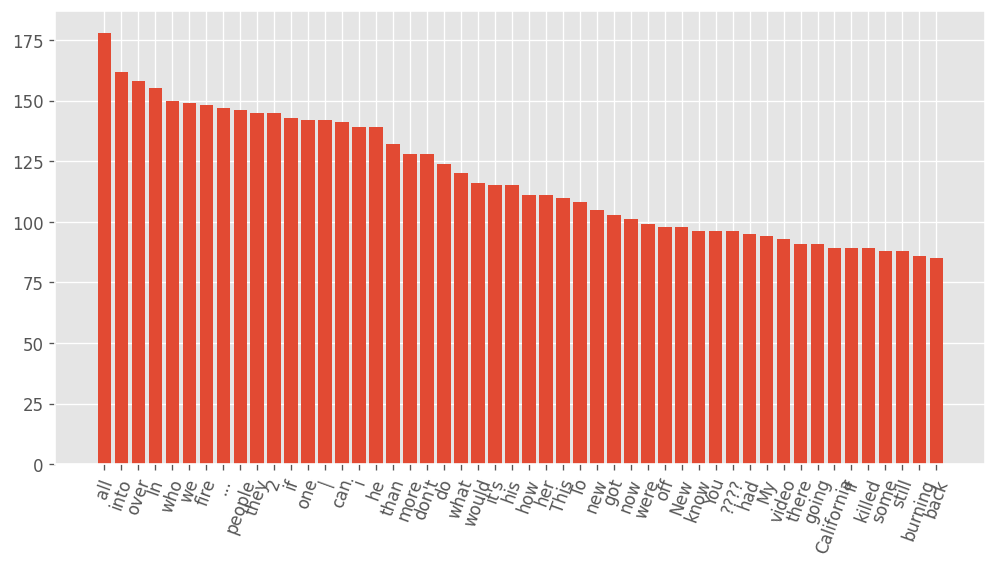

In [ ]:
plt.bar(top40.index,top40.values) #
plt.xticks(rotation=70)

In [ ]:
bigram = prep.get_ngram(tweets,'text',ngram_range=2)

In [ ]:
bigram[:20]

[('ûówe work', 68495),
 ('ûótech business', 68494),
 ('ûónegligence and', 68493),
 ('ûókody vine', 68492),
 ('ûóher upper', 68491),
 ('ûó wallybaiter', 68490),
 ('ûó the', 68489),
 ('ûó stories', 68488),
 ('ûó rt', 68487),
 ('ûó richmond', 68486),
 ('ûó organizers', 68485),
 ('ûó oh', 68484),
 ('ûó now', 68483),
 ('ûó lol', 68482),
 ('ûó integrates', 68481),
 ('ûó https', 68480),
 ('ûó hiroshima', 68479),
 ('ûó head', 68478),
 ('ûó eh', 68477),
 ('ûó desolation', 68476)]

In [ ]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = prep.cont_exp(x)
    x = prep.remove_emails(x)
    x = prep.remove_urls(x)
    x = prep.remove_html_tags(x)
    x = prep.remove_rt(x)
    x = prep.remove_accented_chars(x)
    x = prep.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)   ## duplicate characters removal 
    return x

In [ ]:
tweets['text'] = tweets['text'].apply(lambda x:get_clean(x))

In [ ]:
tweets.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,130 people receive wildfires evacuation orders...,1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,72,16,4.500000,6,2,0,0,0


In [ ]:
bigram = prep.get_ngram(tweets,'text',ngram_range=2)
bigram

[('zxathetis are', 60257),
 ('zurich for', 60256),
 ('zumiez is', 60255),
 ('zss vs', 60254),
 ('zourryart forgot', 60253),
 ('zouma just', 60252),
 ('zouma has', 60251),
 ('zotar50 skeleton', 60250),
 ('zoom in', 60249),
 ('zonewolf123 liked', 60248),
 ('zonesthank god', 60247),
 ('zones donuat', 60246),
 ('zone with', 60245),
 ('zone what', 60244),
 ('zone war', 60243),
 ('zone they', 60242),
 ('zone protectdenaliwolves', 60241),
 ('zone outside', 60240),
 ('zone of', 60239),
 ('zone my', 60238),
 ('zone littlewomenla', 60237),
 ('zone laugh', 60236),
 ('zone johnny', 60235),
 ('zone in', 60234),
 ('zone during', 60233),
 ('zone common', 60232),
 ('zone coming', 60231),
 ('zone but', 60230),
 ('zone and', 60229),
 ('zone amirite', 60228),
 ('zombies take', 60227),
 ('zombie fun', 60226),
 ('zombie feel', 60225),
 ('zombie apocalypse', 60224),
 ('zomatoaus lovefood', 60223),
 ('zojadelin you', 60222),
 ('zodiac girl', 60221),
 ('zippoline as', 60220),
 ('zippers bags', 60219),
 ('zipp

In [ ]:
twts = pd.read_csv('/content/drive/MyDrive/train.csv') 

In [ ]:
twts['text'] = twts['text'].apply(lambda x : get_clean(x))

In [ ]:
twts = prep.get_basic_features(twts)

In [ ]:
twts.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,56,13,4.307692,8,0,0,0,0
1,4,NaN,NaN,forest fire near la ronge sask canada,1,31,7,4.428571,0,0,0,0,0
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,109,22,4.954545,11,0,0,0,0
3,6,NaN,NaN,130 people receive wildfires evacuation orders...,1,53,8,6.625000,1,0,0,1,0
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,70,16,4.375000,7,0,0,0,0


Exploratory data analysis

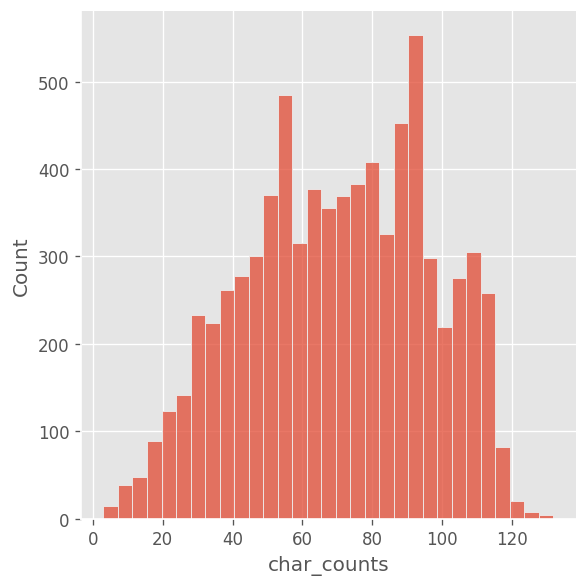

In [ ]:
sns.displot(twts['char_counts'])

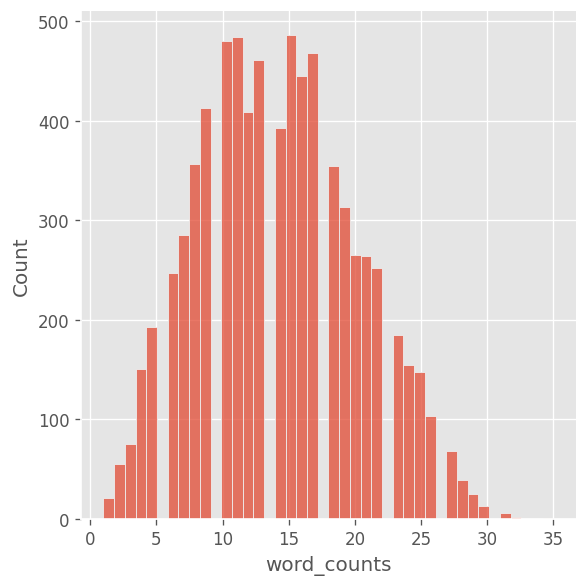

In [ ]:
sns.displot(twts['word_counts'])

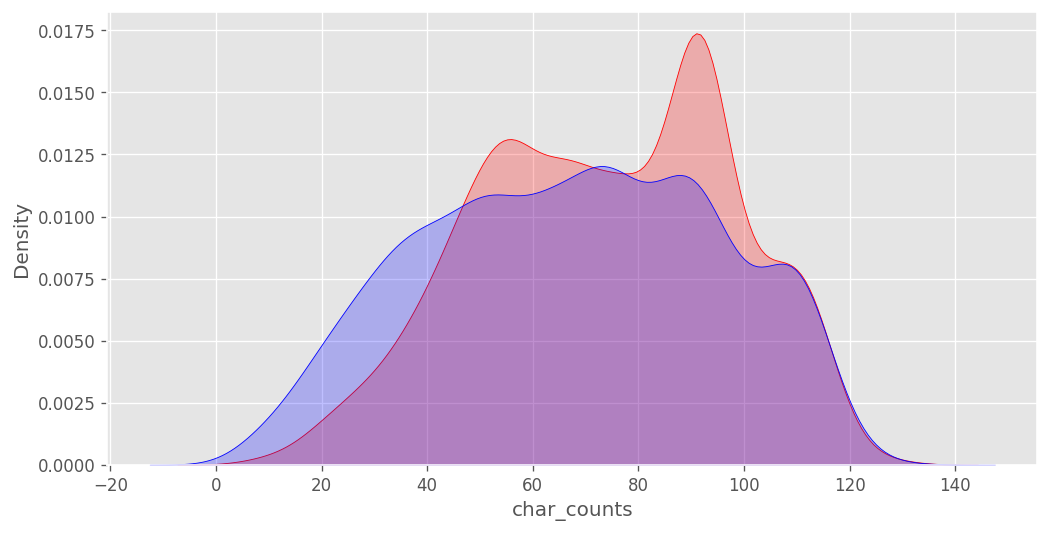

In [ ]:
sns.kdeplot(twts[twts['target'] == 1]['char_counts'],shade=True,color='red')
sns.kdeplot(twts[twts['target'] == 0]['char_counts'],shade=True,color='blue')

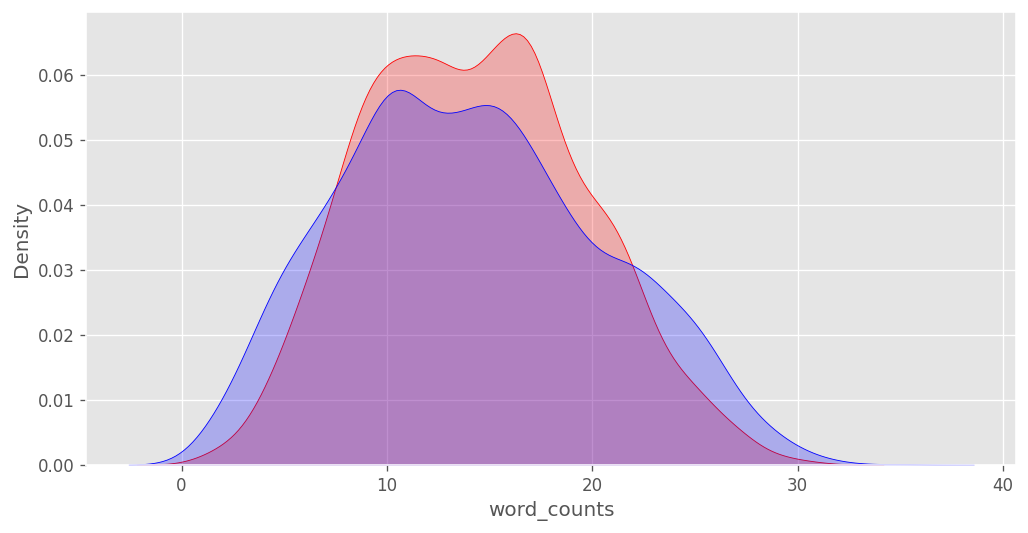

In [ ]:
sns.kdeplot(twts[twts['target'] == 1]['word_counts'],shade=True,color='red')
sns.kdeplot(twts[twts['target'] == 0]['word_counts'],shade=True,color='blue')

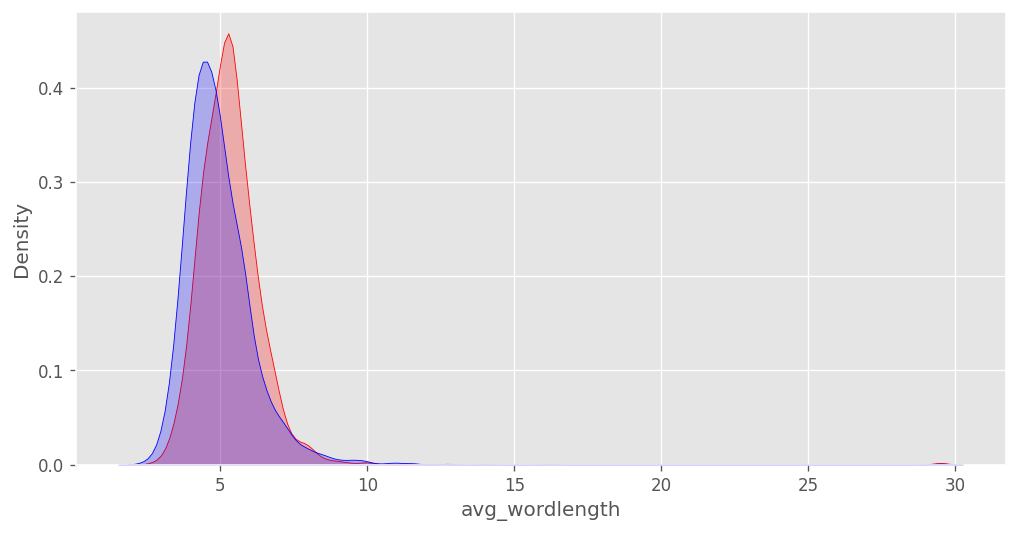

In [ ]:
sns.kdeplot(twts[twts['target'] == 1]['avg_wordlength'],shade=True,color='red')
sns.kdeplot(twts[twts['target'] == 0]['avg_wordlength'],shade=True,color='blue')

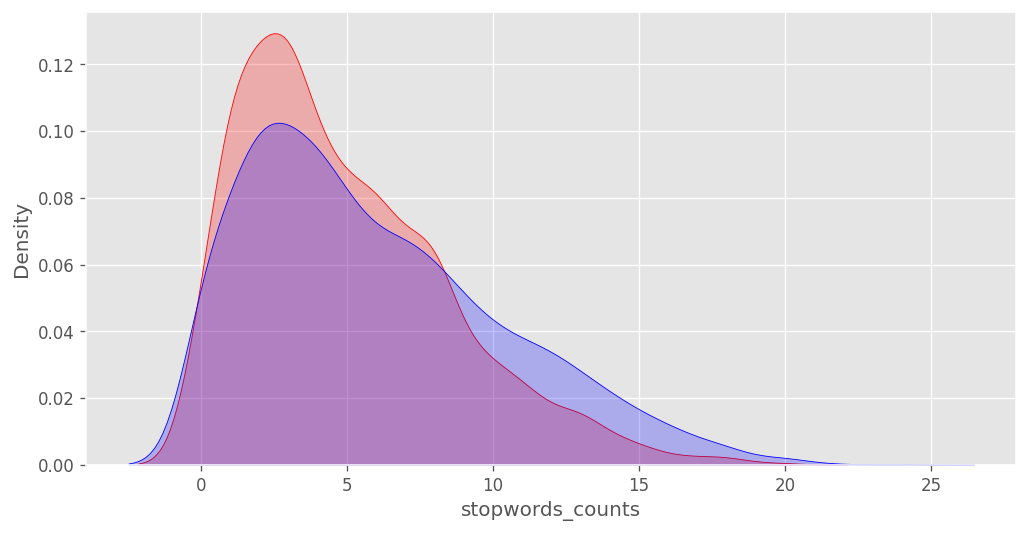

In [ ]:
sns.kdeplot(twts[twts['target'] == 1]['stopwords_counts'],shade=True,color='red')
sns.kdeplot(twts[twts['target'] == 0]['stopwords_counts'],shade=True,color='blue')

In [ ]:
twts.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,56,13,4.307692,8,0,0,0,0
1,4,NaN,NaN,forest fire near la ronge sask canada,1,31,7,4.428571,0,0,0,0,0
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,109,22,4.954545,11,0,0,0,0
3,6,NaN,NaN,130 people receive wildfires evacuation orders...,1,53,8,6.625000,1,0,0,1,0
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,70,16,4.375000,7,0,0,0,0


In [ ]:
freqs = prep.get_word_freqs(twts,'text')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

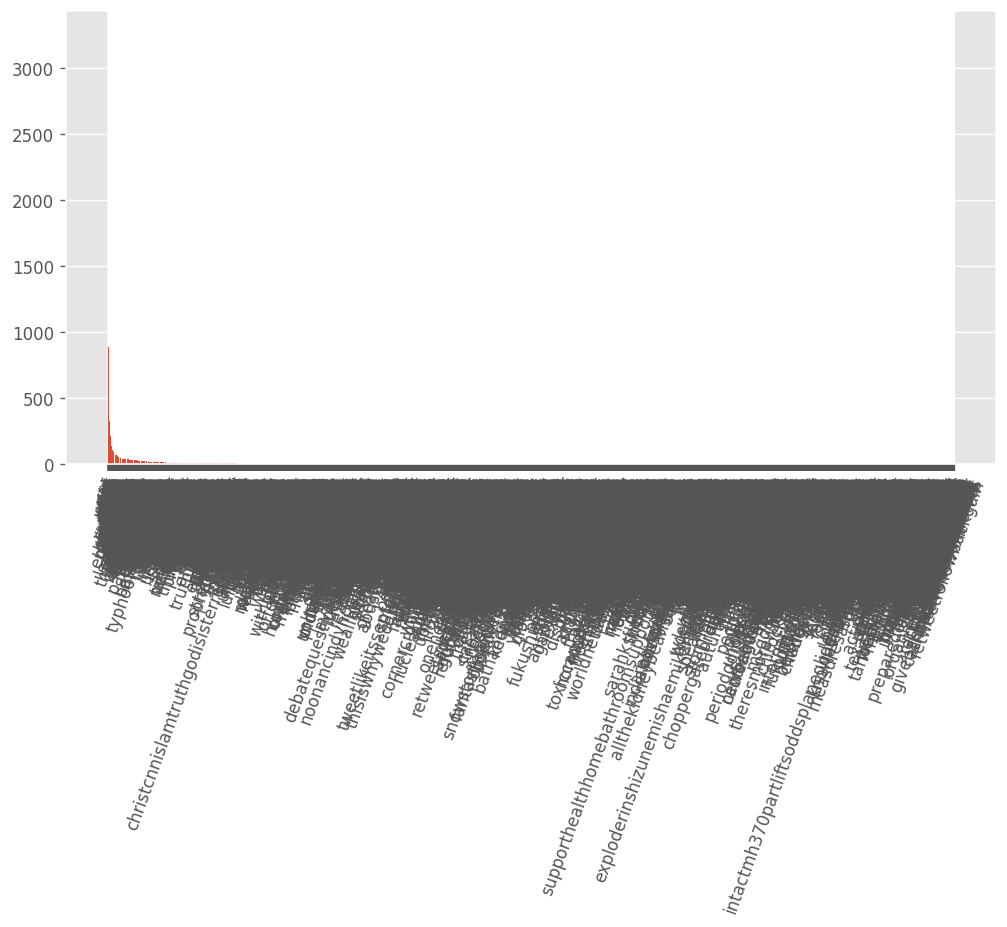

In [ ]:
plt.bar(freqs.index,freqs.values)
plt.xticks(rotation=70)

Word cloud

In [ ]:
import nltk 
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
real = prep.get_word_freqs(twts[twts['target']==1],'text')

In [ ]:
print(len(real))

9550


In [ ]:
real = [r for r in real.index if r not in stop_words]

In [ ]:
print(real)

['fire', 'news', 'via', 'disaster', 'people', 'california', 'suicide', 'police', 'killed', 'like', 'hiroshima', 'fires', 'storm', 'crash', 'families', 'train', 'emergency', 'buildings', 'bomb', '2', 'mh370', 'two', 'nuclear', 'video', 'wildfire', 'attack', 'get', 'accident', 'new', 'one', 'bombing', 'minister', 'prime', 'northern', 'burning', 'dead', 'legionnaires', 'bomber', 'homes', 'car', 'war', 'atomic', 'still', 'fatal', 'obama', 'years', 'collapse', 'us', 'may', 'retweet', 'watch', 'city', 'forest', 'debris', 'first', 'japan', 'malaysia', 'mass', 'latest', 'man', 'water', 'severe', 'today', 'near', 'confirmed', 'earthquake', 'oil', 'would', 'found', 'army', 'spill', 'floods', '70', 'world', 'warning', 'evacuation', 'home', 'wreckage', 'injured', 'could', 'outbreak', 'derailment', 'saudi', 'thunderstorm', 'weather', 'migrants', 'old', '40', 'investigators', 'missing', 'flood', 'flooding', 'say', 'u', 'time', 'bridge', 'back', 'mosque', 'state', 'suspect', 'death', '3', 'kills', 'w

In [ ]:
real = ' '.join(real)
print(real)

fire news via disaster people california suicide police killed like hiroshima fires storm crash families train emergency buildings bomb 2 mh370 two nuclear video wildfire attack get accident new one bombing minister prime northern burning dead legionnaires bomber homes car war atomic still fatal obama years collapse us may retweet watch city forest debris first japan malaysia mass latest man water severe today near confirmed earthquake oil would found army spill floods 70 world warning evacuation home wreckage injured could outbreak derailment saudi thunderstorm weather migrants old 40 investigators missing flood flooding say u time bridge back mosque state suspect death 3 kills wounded island charged many 4 anniversary report yous rescuers hundreds 2015 another area lives reunion air wild affected murder boy live terrorist county day pkk uo year detonated truck drought typhoon school rain hurricane heat deaths refugees 1 got damage says plane evacuated airplane razed since flames hit 

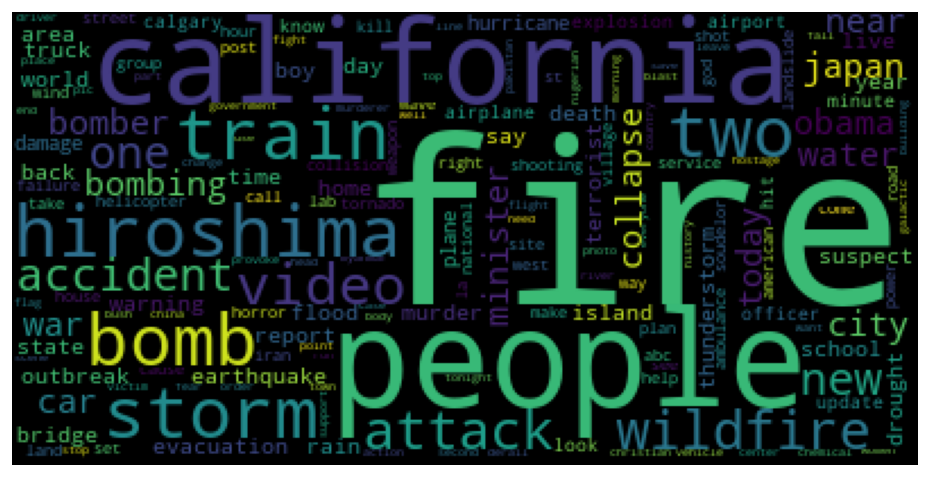

In [ ]:
from wordcloud import WordCloud
word_cloud = WordCloud(max_font_size=100).generate(real)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [ ]:
#non real plot 

non_real = prep.get_word_freqs(twts[twts['target'] == 0],'text')

In [ ]:
print(non_real)

the             1908
i               1367
a               1260
to              1189
and              929
                ... 
puppyshogun        1
slate              1
popcorn            1
editaxohaze        1
capitulation       1
Length: 12639, dtype: int64


In [ ]:
non_real = [nr for nr in non_real.index if nr not in stop_words]
print(non_real)

['like', 'new', 'get', 'would', 'one', 'body', 'people', 'via', 'video', 'loud', 'us', 'love', 'back', 'know', 'time', '2', 'got', 'emergency', 'full', 'see', 'youtube', 'day', 'cannot', 'going', 'still', '3', 'fire', 'good', 'let', 'go', 'think', 'laughing', 'want', 'man', 'ass', 'retweet', 'world', 'life', 'first', 'youre', 'work', 'way', 'burning', 'last', 'really', 'need', 'news', 'make', 'god', 'much', 'best', 'even', 'many', 'content', 'take', 'help', 'could', 'wreck', 'right', 'say', 'black', 'great', 'feel', 'hot', 'today', 'look', 'never', 'every', 'fucking', 'im', 'please', '5', 'cross', 'fear', 'read', 'bags', 'ever', 'fuck', 'night', 'top', 'oh', 'without', 'reddit', 'bag', 'come', 'getting', 'year', 'shit', 'another', 'bloody', 'head', 'liked', 'everyone', 'screaming', 'ruin', 'may', 'smoke', 'always', 'panic', 'death', 'wrecked', 'harm', 'coming', 'well', 'school', '4', '1', 'crash', 'bad', 'buildings', 'face', 'disaster', 'explode', 'check', 'home', 'watch', 'uo', 'milit

In [ ]:
non_real = ' '.join(non_real)

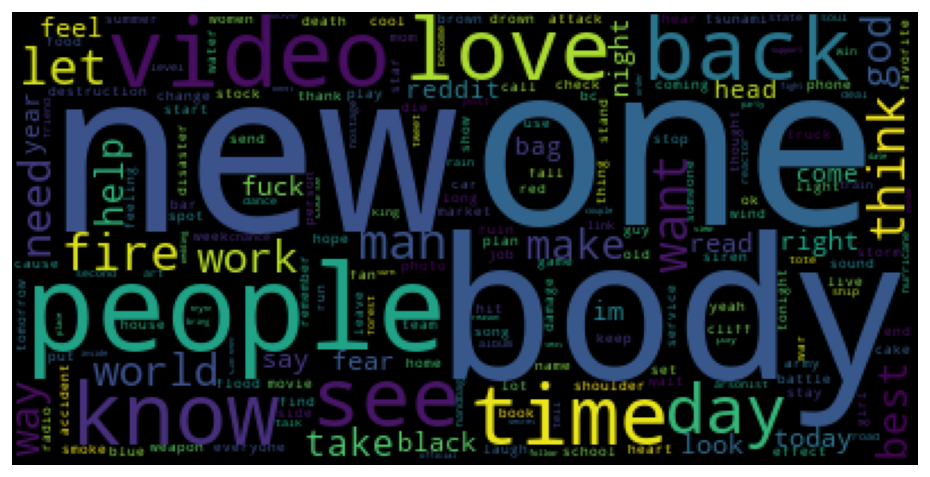

In [ ]:
wc = WordCloud(max_font_size=100).generate(non_real)
plt.imshow(wc)
plt.axis('off')
plt.show()

Classification using TFIDF and SVM

In [ ]:
text = twts['text']
y = twts['target']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
X = tf.fit_transform(text)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.25,stratify=y)

In [ ]:
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(5709, 18077)
(1904, 18077)
(5709,)
(1904,)


In [ ]:
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC

In [ ]:
def run_svm(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print('Classification report')
  print(classification_report(y_test,y_pred))


In [ ]:
clf = LinearSVC()
run_svm(clf,Xtrain,Ytrain,Xtest,Ytest)

Classification report
              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1086
           1       0.79      0.72      0.75       818

    accuracy                           0.79      1904
   macro avg       0.79      0.79      0.79      1904
weighted avg       0.79      0.79      0.79      1904



Classification with Word2Vec and SVM

In [ ]:
!python -m spacy download en_core_web_md

     |████████████████████████████████| 96.4MB 1.2MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp37-none-any.whl size=98051305 sha256=a6152f8dda6d98e55f060ddc772194d91e2b0ac9d7260c757a7e6003d11d86f4
  Stored in directory: /tmp/pip-ephem-wheel-cache-54cwulky/wheels/df/94/ad/f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
import spacy
import en_core_web_md

In [ ]:
nlp = en_core_web_md.load()

In [ ]:
def get_vec(x):
  doc = nlp(x)
  vec = doc.vector
  return vec

In [ ]:
twts['vec'] = twts['text'].apply(lambda x : get_vec(x))

In [ ]:
twts.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,vec
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,56,13,4.307692,8,0,0,0,0,"[-0.26623327, 0.05843069, -0.1404636, -0.05265..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,31,7,4.428571,0,0,0,0,0,"[-0.009459994, -0.056422852, -0.12030244, -0.2..."
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,109,22,4.954545,11,0,0,0,0,"[-0.0047025327, 0.0086247735, -0.08182314, -0...."
3,6,NaN,NaN,130 people receive wildfires evacuation orders...,1,53,8,6.625000,1,0,0,1,0,"[-0.12268206, 0.246985, 0.115619004, -0.124551..."
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,70,16,4.375000,7,0,0,0,0,"[-0.021672813, -0.016790753, -0.019530633, 0.0..."


In [ ]:
X = twts['vec'].to_numpy()

In [ ]:
print(X.shape)

(7613,)


In [ ]:
X = X.reshape(-1,1)
print(X.shape)

(7613, 1)


In [ ]:
print(len(X[0][0]))

300


In [ ]:
X = np.concatenate(np.concatenate(X,axis=0),axis=0).reshape(-1,300)

In [ ]:
print(X.shape)

(7613, 300)


In [ ]:
y = twts['target']

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.25,stratify=y)

In [ ]:
clf = LinearSVC()
run_svm(clf,Xtrain,Ytrain,Xtest,Ytest)

Classification report
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1086
           1       0.77      0.71      0.74       818

    accuracy                           0.79      1904
   macro avg       0.78      0.78      0.78      1904
weighted avg       0.78      0.79      0.78      1904



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
run_svm(xgb,Xtrain,Ytrain,Xtest,Ytest)

Classification report
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1086
           1       0.79      0.72      0.75       818

    accuracy                           0.80      1904
   macro avg       0.79      0.79      0.79      1904
weighted avg       0.80      0.80      0.79      1904



Word Embeddings and Classification with Deep Learning

In [ ]:
import tensorflow
from tensorflow import keras

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Dropout
from tensorflow.keras.layers import Conv1D,MaxPooling1D,GlobalMaxPooling1D

In [ ]:
token = Tokenizer()
token.fit_on_texts(twts['text'])

In [ ]:
vocab_size = len(token.word_index) + 1
vocab_size

18113

In [ ]:
print(token.word_index)

{'the': 1, 'a': 2, 'in': 3, 'to': 4, 'of': 5, 'i': 6, 'and': 7, 'is': 8, 'for': 9, 'you': 10, 'on': 11, 'it': 12, 'my': 13, 'not': 14, 'that': 15, 'with': 16, 'at': 17, 'by': 18, 'this': 19, 'have': 20, 'are': 21, 'from': 22, 'be': 23, 'was': 24, 'do': 25, 'like': 26, 'as': 27, 'out': 28, 'am': 29, 'so': 30, 'your': 31, 'up': 32, 'just': 33, 'me': 34, 'but': 35, 'will': 36, 'after': 37, 'has': 38, 'all': 39, 'no': 40, 'an': 41, 'fire': 42, 'when': 43, 'if': 44, 'new': 45, 'he': 46, 'we': 47, 'get': 48, 'they': 49, 'now': 50, 'about': 51, 'via': 52, 'more': 53, 'people': 54, 'what': 55, 'or': 56, 'how': 57, 'one': 58, 'been': 59, 'there': 60, 'over': 61, 'news': 62, 'would': 63, 'who': 64, 'into': 65, 'were': 66, 'video': 67, '2': 68, 'can': 69, 'emergency': 70, 'disaster': 71, 'us': 72, 'police': 73, 'than': 74, 'off': 75, 'her': 76, 'some': 77, 'still': 78, 'his': 79, 'body': 80, 'back': 81, 'time': 82, 'burning': 83, 'crash': 84, 'california': 85, 'suicide': 86, 'know': 87, 'storm': 

In [ ]:
encoded_txt = token.texts_to_sequences(twts['text'])
print(encoded_txt)

[[105, 4455, 21, 1, 860, 5, 19, 244, 124, 1673, 4456, 72, 39], [183, 42, 221, 647, 6712, 6713, 1323], [39, 1674, 1432, 4, 2048, 3, 648, 21, 121, 6714, 18, 1675, 40, 428, 250, 56, 2048, 3, 648, 1324, 21, 1048], [2791, 54, 4457, 1325, 250, 1324, 3, 85], [33, 89, 1154, 19, 306, 22, 6715, 2049, 27, 258, 22, 1325, 6716, 65, 2, 184], [2792, 384, 85, 1551, 575, 821, 3, 629, 6717, 556, 4, 1102, 364, 42, 4458, 1325], [222, 71, 822, 278, 1155, 823, 245, 5, 1849, 3, 6718, 991, 2328, 1552], [6, 29, 11, 223, 5, 1, 1850, 7, 6, 69, 102, 2, 42, 3, 1, 4459], [60, 8, 41, 70, 250, 1233, 50, 3, 1, 576, 824, 1, 701], [6, 29, 2329, 15, 1, 482, 8, 237, 4, 105, 365], [577, 54, 600, 22, 1, 283, 456, 30, 601], [825, 630, 2793, 8, 214, 2794, 3435, 649, 2, 650, 6, 196, 3, 630, 2793, 55, 29, 6, 297, 25, 55, 29, 6, 297, 25, 6719, 245], [2795, 245, 2050, 6720, 2793, 1433, 56, 1049, 602, 6, 20, 731, 3436], [222, 3, 4460, 906, 47, 1676, 4460], [238, 4, 184, 385, 11, 2330, 3, 4461, 122, 84, 349], [631, 32, 95], [6, 107

In [ ]:
print(encoded_txt[0])
print(encoded_txt[1])

[105, 4455, 21, 1, 860, 5, 19, 244, 124, 1673, 4456, 72, 39]
[183, 42, 221, 647, 6712, 6713, 1323]


In [ ]:
max_len = max([len(w) for w in encoded_txt])
max_len

35

In [ ]:
padded_seq = pad_sequences(encoded_txt,maxlen=max_len,padding='post')

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(padded_seq,y,test_size=0.25,stratify=y)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,100,input_length=max_len))

model.add(Conv1D(filters=32,kernel_size=(2),strides=2,activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(GlobalMaxPooling1D())

model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 35, 100)           1811300   
_________________________________________________________________
conv1d (Conv1D)              (None, 17, 32)            6432      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 32)             0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 32)             0         
_________________________________________________________________
dense (Dense)                (None, 8, 64)             2112      
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(Xtrain,Ytrain,epochs=10,validation_data=(Xtest,Ytest))

Epoch 1/10
179/179 [==============================] - 36s 20ms/step - loss: 0.6747 - accuracy: 0.5611 - val_loss: 0.5152 - val_accuracy: 0.7637
Epoch 2/10
179/179 [==============================] - 3s 18ms/step - loss: 0.4061 - accuracy: 0.8387 - val_loss: 0.4658 - val_accuracy: 0.7826
Epoch 3/10
179/179 [==============================] - 3s 18ms/step - loss: 0.2053 - accuracy: 0.9323 - val_loss: 0.5272 - val_accuracy: 0.7721
Epoch 4/10
179/179 [==============================] - 3s 18ms/step - loss: 0.1114 - accuracy: 0.9658 - val_loss: 0.6383 - val_accuracy: 0.7652
Epoch 5/10
179/179 [==============================] - 3s 18ms/step - loss: 0.0682 - accuracy: 0.9785 - val_loss: 0.6714 - val_accuracy: 0.7521
Epoch 6/10
179/179 [==============================] - 3s 19ms/step - loss: 0.0528 - accuracy: 0.9836 - val_loss: 0.6851 - val_accuracy: 0.7642
Epoch 7/10
179/179 [==============================] - 3s 18ms/step - loss: 0.0467 - accuracy: 0.9853 - val_loss: 0.6939 - val_accuracy: 0.765

In [ ]:
def get_encoded(x):
  x = get_clean(x)
  x = token.texts_to_sequences([x])
  x = pad_sequences(x,maxlen=max_len,padding='post')
  return x

In [ ]:
x ='i am thrilled to see this'
vec = get_encoded(x)

In [ ]:
np.argmax(model.predict(vec),axis=-1)

array([0])

BERT model building and training

In [ ]:
#!pip install ktrain

     |████████████████████████████████| 25.3MB 131kB/s 
     |████████████████████████████████| 6.8MB 52.3MB/s 
     |████████████████████████████████| 983kB 52.4MB/s 
     |████████████████████████████████| 266kB 52.7MB/s 
     |████████████████████████████████| 1.9MB 47.6MB/s 
     |████████████████████████████████| 1.2MB 52.7MB/s 
     |████████████████████████████████| 471kB 48.2MB/s 
     |████████████████████████████████| 3.3MB 52.0MB/s 
     |████████████████████████████████| 901kB 49.7MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.2-cp37-none-any.whl size=25277794 sha256=8ac2bc8e4614a3484873475997d9a1635b5c08d6f94b2d4a07c88e057c83fdb9
  Stored in directory: /root/.cache/pip/wheels/67/2e/f1/c72afa08df8b2d984b910dea228902ce81dae4511afe9fafd2
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=b1d7772eec8ddd5770b9fa98aee59c829f9a513379e35dbc930dd806b26663ba
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d4

In [ ]:
#import ktrain
#from ktrain import text


ImportError: ignored

In [ ]:
#(Xtrain,Ytrain),(Xtest,Ytest), preproc = text.texts_from_df(train_df=twts,text_column='text',label_columns='target',maxlen=max_len,preprocess_mode='bert')

In [ ]:
#model = text.text_classifier(name='bert',train_data=(Xtrain,Ytrain),preproc=preproc)

In [ ]:
#for layer in model.layers:
#  layer.trainable = False

In [ ]:
#x = Dense(2,activation='softmax')(model.output)

In [ ]:
#from tensorflow.keras.models import Model
#mod = Model(inputs=model.input,outputs=x)
#mod.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#print(mod.summary())

In [ ]:
#learner = ktrain.get_learner(model=mod,train_data=(Xtrain,Ytrain),val_data=(Xtest,Ytest),batch_size=64)

In [ ]:
#learner.fit_onecycle(lr=2e-5,epochs=10)

In [ ]:
embeddings_index = dict()

f = open('/content/drive/MyDrive/glove.6B.200d.txt',mode='rt',encoding='utf-8')

In [ ]:
import numpy as np
for line in f:
    values = line.split()
    words = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embeddings_index[words] = coefs
f.close()

In [ ]:
print('Loaded word vectors',len(embeddings_index))

Loaded word vectors 400000


In [ ]:
# create a weight matrix for words in training data
embedding_matrix = np.zeros((vocab_size,200))

for word,i in token.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if(embedding_vector is not None):
        embedding_matrix[i] = embedding_vector

In [ ]:
from pickle import load
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import concatenate

In [ ]:
def build_model(vocab_size,length):
    
    # channel 1
    inputs1 = Input(shape=(length,))
    embedding1 = Embedding(vocab_size,200,weights=[embedding_matrix],trainable=False)(inputs1)
    conv1 = Conv1D(filters=32,kernel_size=4,activation='relu')(embedding1)
    drop1 = Dropout(0.2)(conv1)
    maxpool1 = MaxPooling1D(pool_size=2)(drop1)
    flat1 = Flatten()(maxpool1)
    
    # channel 2
    inputs2 = Input(shape=(length,))
    embedding2 = Embedding(vocab_size,200,weights=[embedding_matrix],trainable=False)(inputs2)
    conv2 = Conv1D(filters=32,kernel_size=6,activation='relu')(embedding2)
    drop2 = Dropout(0.2)(conv2)
    maxpool2 = MaxPooling1D(pool_size=2)(drop2)
    flat2 = Flatten()(maxpool2)
    
    #channel 3 
    inputs3 = Input(shape=(length,))
    embedding3 = Embedding(vocab_size,200,weights=[embedding_matrix],trainable=False)(inputs3)
    conv3 = Conv1D(filters=32,kernel_size=8,activation='relu')(embedding3)
    drop3 = Dropout(0.2)(conv3)
    maxpool3 = MaxPooling1D(pool_size=2)(drop3)
    flat3 = Flatten()(maxpool3)
    
    #merge 
    merged = concatenate([flat1,flat2,flat3])
    
    #Dense layers
    Dense1 = Dense(128,activation='relu')(merged)
    Dense2 = Dense(256,activation='relu')(Dense1)
    Dense3 = Dense(448,activation='relu')(Dense2)
    Dense4 = Dense(512,activation='relu')(Dense3)
    Dense5 = Dense(1024,activation='relu')(Dense4)
    outputs = Dense(1,activation='sigmoid')(Dense5)
    
    model = Model(inputs = [inputs1,inputs2,inputs3],outputs=outputs)
    
    #compile
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])
    
    model.summary()
    
    return model

In [ ]:
model = build_model(vocab_size,max_len)

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_45 (InputLayer)           [(None, 35)]         0                                            
__________________________________________________________________________________________________
input_46 (InputLayer)           [(None, 35)]         0                                            
__________________________________________________________________________________________________
input_47 (InputLayer)           [(None, 35)]         0                                            
__________________________________________________________________________________________________
embedding_44 (Embedding)        (None, 35, 200)      3622600     input_45[0][0]                   
____________________________________________________________________________________________

In [ ]:
model.fit([Xtrain,Xtrain,Xtrain],Ytrain,epochs=10,batch_size=16)

Epoch 1/10
357/357 [==============================] - 3s 5ms/step - loss: 0.5796 - accuracy: 0.6899
Epoch 2/10
357/357 [==============================] - 2s 5ms/step - loss: 0.4213 - accuracy: 0.8193
Epoch 3/10
357/357 [==============================] - 2s 5ms/step - loss: 0.3225 - accuracy: 0.8643
Epoch 4/10
357/357 [==============================] - 2s 5ms/step - loss: 0.2532 - accuracy: 0.9044
Epoch 5/10
357/357 [==============================] - 2s 5ms/step - loss: 0.1770 - accuracy: 0.9280
Epoch 6/10
357/357 [==============================] - 2s 5ms/step - loss: 0.1139 - accuracy: 0.9528
Epoch 7/10
357/357 [==============================] - 2s 5ms/step - loss: 0.0960 - accuracy: 0.9683
Epoch 8/10
357/357 [==============================] - 2s 5ms/step - loss: 0.0899 - accuracy: 0.9677
Epoch 9/10
357/357 [==============================] - 2s 5ms/step - loss: 0.0765 - accuracy: 0.9687
Epoch 10/10
357/357 [==============================] - 2s 5ms/step - loss: 0.0934 - accuracy: 0.9647

In [ ]:
loss, acc = model.evaluate([Xtest,Xtest,Xtest],Ytest)
print(acc)

60/60 [==============================] - 0s 4ms/step - loss: 1.1742 - accuracy: 0.7978
0.7977941036224365


In [ ]:
model.save('79_percent.h5')

Removing stop words

In [ ]:
twts.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,56,13,4.307692,8,0,0,0,0
1,4,NaN,NaN,forest fire near la ronge sask canada,1,31,7,4.428571,0,0,0,0,0
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,109,22,4.954545,11,0,0,0,0
3,6,NaN,NaN,130 people receive wildfires evacuation orders...,1,53,8,6.625000,1,0,0,1,0
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,70,16,4.375000,7,0,0,0,0


In [ ]:
X = twts['text']
y = twts['target']

In [ ]:
print(len(X))
print(len(y))

7613
7613


In [ ]:
import nltk
nltk.download('stopwords')

stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
X = [x for x in X if x not in stop_words]


In [ ]:
print(len(X))

7613


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

encoded_seq = tokenizer.texts_to_sequences(X)
print(encoded_seq[0])

max_len = max([len(w) for w in encoded_seq])
print(max_len)

padded_seq = pad_sequences(encoded_seq, maxlen=max_len,padding='post')
print(padded_seq[0])

18113
[105, 4455, 21, 1, 860, 5, 19, 244, 124, 1673, 4456, 72, 39]
35
[ 105 4455   21    1  860    5   19  244  124 1673 4456   72   39    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]


In [ ]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(padded_seq,y,test_size=0.25,stratify=y)

In [ ]:
def build_model(vocab_size,length):
    
    # channel 1
    inputs1 = Input(shape=(length,))
    embedding1 = Embedding(vocab_size,200,weights=[embedding_matrix],trainable=False)(inputs1)
    conv1 = Conv1D(filters=32,kernel_size=4,activation='relu')(embedding1)
    drop1 = Dropout(0.2)(conv1)
    maxpool1 = MaxPooling1D(pool_size=2)(drop1)
    flat1 = Flatten()(maxpool1)
    
    # channel 2
    inputs2 = Input(shape=(length,))
    embedding2 = Embedding(vocab_size,200,weights=[embedding_matrix],trainable=False)(inputs2)
    conv2 = Conv1D(filters=32,kernel_size=6,activation='relu')(embedding2)
    drop2 = Dropout(0.2)(conv2)
    maxpool2 = MaxPooling1D(pool_size=2)(drop2)
    flat2 = Flatten()(maxpool2)
    
    #channel 3 
    inputs3 = Input(shape=(length,))
    embedding3 = Embedding(vocab_size,200,weights=[embedding_matrix],trainable=False)(inputs3)
    conv3 = Conv1D(filters=32,kernel_size=8,activation='relu')(embedding3)
    drop3 = Dropout(0.2)(conv3)
    maxpool3 = MaxPooling1D(pool_size=2)(drop3)
    flat3 = Flatten()(maxpool3)
    
    #merge 
    merged = concatenate([flat1,flat2,flat3])
    
    #Dense layers
    Dense1 = Dense(128,activation='relu')(merged)
    Dense2 = Dense(256,activation='relu')(Dense1)
    Dense3 = Dense(448,activation='relu')(Dense2)
    Dense4 = Dense(512,activation='relu')(Dense3)
    Dense5 = Dense(1024,activation='relu')(Dense4)
    outputs = Dense(1,activation='sigmoid')(Dense5)
    
    model = Model(inputs = [inputs1,inputs2,inputs3],outputs=outputs)
    
    #compile
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])
    
    model.summary()
    
    return model

In [ ]:
model = build_model(vocab_size,max_len)
model.fit([Xtrain,Xtrain,Xtrain],Ytrain,epochs=10,batch_size=16)

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_48 (InputLayer)           [(None, 35)]         0                                            
__________________________________________________________________________________________________
input_49 (InputLayer)           [(None, 35)]         0                                            
__________________________________________________________________________________________________
input_50 (InputLayer)           [(None, 35)]         0                                            
__________________________________________________________________________________________________
embedding_47 (Embedding)        (None, 35, 200)      3622600     input_48[0][0]                   
____________________________________________________________________________________________

In [ ]:
loss, acc = model.evaluate([Xtest,Xtest,Xtest],Ytest)
print(acc)

60/60 [==============================] - 0s 4ms/step - loss: 1.3523 - accuracy: 0.7532
0.7531512379646301


In [ ]:
from nltk.stem.porter import *

In [ ]:
stemmer = PorterStemmer()
Xstemmed = [stemmer.stem(x) for x in X]


In [ ]:
print(Xstemmed[:5])

['our deeds are the reason of this earthquake may allah forgive us al', 'forest fire near la ronge sask canada', 'all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expect', '130 people receive wildfires evacuation orders in california', 'just got sent this photo from ruby alaska as smoke from wildfires pours into a school']


In [ ]:
print(X[0])
print(stemmer.stem(X[0]))

our deeds are the reason of this earthquake may allah forgive us all
our deeds are the reason of this earthquake may allah forgive us al


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(Xstemmed)

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

encoded_seq = tokenizer.texts_to_sequences(Xstemmed)
print(encoded_seq[0])

max_len = max([len(w) for w in encoded_seq])
print(max_len)

padded_seq = pad_sequences(encoded_seq, maxlen=max_len,padding='post')
print(padded_seq[0])

18573
[104, 6841, 21, 1, 852, 5, 19, 322, 122, 1689, 4570, 73, 594]
35
[ 104 6841   21    1  852    5   19  322  122 1689 4570   73  594    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]


In [ ]:
# create a weight matrix for words in training data
embedding_matrix = np.zeros((vocab_size,200))

for word,i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if(embedding_vector is not None):
        embedding_matrix[i] = embedding_vector

In [ ]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(padded_seq,y,test_size=0.25,stratify=y)

In [ ]:
model = build_model(vocab_size,max_len)
model.fit([Xtrain,Xtrain,Xtrain],Ytrain,epochs=10,batch_size=16)

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_52 (InputLayer)           [(None, 35)]         0                                            
__________________________________________________________________________________________________
input_53 (InputLayer)           [(None, 35)]         0                                            
__________________________________________________________________________________________________
input_54 (InputLayer)           [(None, 35)]         0                                            
__________________________________________________________________________________________________
embedding_51 (Embedding)        (None, 35, 200)      3714600     input_52[0][0]                   
____________________________________________________________________________________________

In [ ]:
loss, acc = model.evaluate([Xtest,Xtest,Xtest],Ytest)
print(acc)

60/60 [==============================] - 0s 4ms/step - loss: 1.1516 - accuracy: 0.7715
0.7715336084365845
